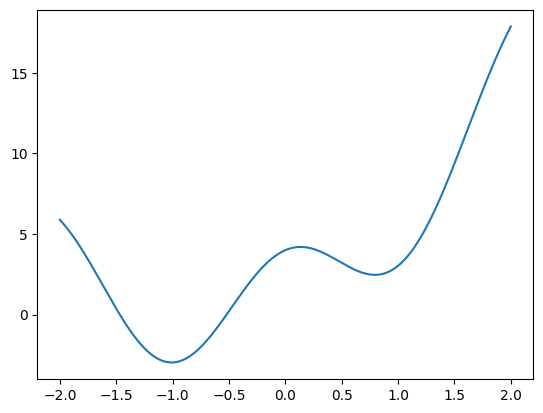

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 300
x0 = np.linspace(-2.0, 2.0, n)
a0 = 3.0
a1 = 2.0
b0 = 1.0
kk = 3
y0 = np.zeros(n)
y0[:] = a0*x0+a1*x0**2 + b0 + 3*np.cos(kk*x0)

plt.plot(x0,y0 )
plt.show()

In [3]:
def make_phi(x0,n,k):    
    phi = np.array([x0])
#    phi = np.array([x0**j for j in range(k)])
    return phi.T

In [4]:
x0 = np.linspace(-2.0, 2.0, n)
k = 1
phi = make_phi(x0,n,k)

In [5]:
n_test = 100
x0_test = np.linspace(-2.0, 2.0, n_test)
y0_test = np.zeros(n_test)
y0_test[:] = a0*x0_test+a1*x0_test**2 + b0 + 3*np.cos(kk*x0_test)
phi_test = make_phi(x0_test,n_test,k)

In [6]:
batch_size = 20
dataset = tf.data.Dataset.from_tensor_slices({"phi":phi, "y0":y0}).shuffle(10).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices({"phi":phi_test, "y0":y0_test}).batch(n_test)
iterator = tf.data.Iterator.from_structure(dataset.output_types,
                                           dataset.output_shapes)
train_init_op = iterator.make_initializer(dataset)
test_init_op = iterator.make_initializer(test_dataset)
next_step= iterator.get_next()

AttributeError: type object 'IteratorBase' has no attribute 'from_structure'

In [ ]:
def build_graph_layers_class(d_input,d_middle,d_type):
    x = next_step["phi"]
    yout= next_step["y0"]
    hidden1 = tf.layers.Dense(units=d_middle,activation=tf.nn.relu)
    x1 = hidden1(x)
    outlayer = tf.layers.Dense(units=1,activation=None)
    y = outlayer(x1)

    diff = tf.subtract(y,yout)
    loss = tf.nn.l2_loss(diff)
    minimize = tf.train.AdamOptimizer().minimize(loss)
    return x,y,yout,diff,loss,minimize,hidden1,outlayer

In [ ]:
d_type = tf.float32
d_input = 1
d_middle = 10
x,y,yout,diff,loss,minimize,hidden1,outlayer= build_graph_layers_class(d_input,d_middle,d_type)

In [ ]:
np = 5000
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(np):
        sess.run(train_init_op)
        while True:
            try:
                sess.run(minimize)
                #print(sess.run(next_step))
                losstrain = sess.run(loss)/batch_size
                #print(losstrain)


            except tf.errors.OutOfRangeError:
                break

        sess.run(test_init_op)
        losstest = sess.run(loss)/n_test
        if i % 100 is 0:
            print("i",i,"loss",losstest)
    W = sess.run(hidden1.weights)
    print(W)
    a = sess.run(outlayer.weights)
    print(a)
    sess.run(test_init_op)
    yt = sess.run(y)

plt.plot(x0_test,y0_test )
plt.plot(x0_test,yt )
plt.show()

In [ ]:
d_type = tf.float32
d_input = 1
d_middle = 10
x,y,yout,diff,loss,minimize,hidden1,outlayer= build_graph_layers_class(d_input,d_middle,d_type)